# High Level questions answered

1. What are the elements of a computers architecture
2. What are some common alternative computer architectures
3. How does Python abstract the underlying computer architecture
4. What are some hurdles making Python performant
5. What strategies can help you become a highly performant programmer



# The Fundamental Computer System

The computer system can be broken down into three parts

1. The computing units
2. The memory units
3. the connections between them

- Each unit has different properties.. see below


#### Computation Unit:

    - How many computations can be done per second
    
#### Memory Unit:

    - How much data it can hold
    - how fast we can read write data to it

#### Connections:

    - How fast they can move data from one place to another
    

#### The Standard workstation would have:

    - CPU or Central Processing Unit as the computation unit
    - RAM and hard drive as two seperate memory units (having different read/write speeds)
    - Bus that provides the connections between all of these parts 
    
#### Some general notes:

    - The CPU itself has several memory units in it: the L1,L2 and sometimes even L3 and L4 cache which have small capacities but very fast speeds.
    - New computer architectures generally come with new configurations (skylake replaces the frontside bus)
    - Neglected network connection, which is effectively a very slow connection to potentially many other computing and memory units
    
    

# Computing Units

### Overview

- Computing Unit is the centerpiece of a computers usefulness
- Provides the abilty to transform any bits it recieves as an input into other bits as an output, or change the state of the current process
- CPU(s) are the most commonly used compute unit
- GPU(s) are more commonly being used for parrell computation, more applicable to numerical applicatons. Basically allow for more computations to happen in parrell. 
- some compute units have very specialized operations that they can run (such as fused multiply - A,B,C --> A * B + C )


#### Units of measurement (# of operations in a cycle, # of cycles in a second) 

- Main properties of interest in a computing unit are the number of operations it can do in a cycle and the number of cycles it can do in a second. 

1. # of operations in a cycle is measured by it's Instructions per Cycle (IPC)
2. # of cycles in a second is measured by clock speed. 

- These two measures are always competing with each other when new computing units are made. 
- Increasing clock speed almost immediately speeds up all programs running on that computational unit
- Increasing IPC will also increase computing through vectorization
- Vectorization is when a CPU is provided multiple pieces of data at the same time and is able to operate on all of them at once. 
- This sort of CPU instructurion is known as single instruction, Multiple Data
- Basically thresholds have been reached in terms of improving Clock Speed and IPC so chip manufacturers are using hyperthreading, out of order execution and multi-core architectures. 


#### Hyperthreading

- One technique that transistor manufacturers are using to increase performance is hyperthreading
- hyperthreading creates a virtual second CPU to the host operating system (OS) and clever hardware logic tries to interleave two theads of instructions into the execution units of a single CPU
- Typically works best for when each unit of work has different types of execution units - for example one is using floating points and the other integers


#### Out of Order Execution

- Enables a compiler to spot parts of a linear program sequence that do not depend on the results of a previous piece of work, and therefore that both piees of work could occur in any order or at the same time
- This allows for a program to execute correctly, even though pieces of work are computed out of order


#### Multi Core Architectures

- Most important for higher level programmers. Multi Core architecures are very prevelant. 
- These architectures include multiple CPUs in the same unit
- Basically a computer should have multiple isolated computing units
- Increases the total number of operations that can be done per second
- Simply adding more cores does not always speed up a programs execution time. This is because of something known as Amdahls law. Basically if a program designed to run on multiple cores has some subroutines that must run on one core, this will be the limitation for the maximum speedup that can be achieved by allocating more cores. 


EXAMPLE: 

'''
If we had a survey we wanted 100 people to fill out, and that survey took 1 minute to complete, we could complete this task in 100 minutes if we had one person asking the questions. This can be thought of as a serial process (1 operation needs to be satisfied before moving onto the next)


however, if we wanted to perform the survey in parrell by having two people asking the questions, that would allow us to process the surveys in 50 minutes. This can be done because each individual person asking the questions does not need to know anything about the other person asking the questions. As a result, the task can be easily split up with no dependency on the question askers


This process can be continually speed up until we reach 100 people asking questions. Any additional people would basically have nothing to do. Which means our maximum completion time would be 1 minute. The survey, the serial part of the problem, needs to be sped up to further increase performance.


Basically we can continue to add speciic cores to finish a task. In other words, the bottleneck in any parrell calculation is always the smaller serial tasks that are being spread out


* A note on python - It has a GIL (Global interpretur lock) so you essentially can only run one process at a time on any cores (one question taker).

# Memory Units

### Overview

- Memory Unitsin computers are used to store bits
- These could be bits representing variables in your program, or pixels in an image - as examples
- Abstraction of a memory unit applies to registers in your motherboard as well as your RAM and hard drive. 

Two Major differentiators of Memory Units- 

1) Read Write Speed
2) Latency


### Read write speed 

- The one major difference between all of these types of memory units is the speed at which they can read/write data.
- To make things more complex .... the read write speed is heavily dependent on the way that data is being read. 
- For example - Most memory units perform much better when they read one large chunk of data as opposed to many small chunks. (sequential read vs random access). If you think of it like a book - basically it's much faster to read page by page vs through random pages. 


### Latency
- Time it takes the device to find the data that is being used. For a spinning hard drive, this latency can be high because the disk needs to physically spin up to speed and the read head must move to the right position. 




### Different Memory Units found inside workstation

#### Spinning hard drive
* Long term storage that persists even when computer is shut down.


#### Solid state drive
* Similar to spinning hard drive, with faster read/write speeds but smaller capacity (1 terrabyte range).
* Measured with IOPS

#### RAM
* Used to store application code and data. Has fast read/write charachteristics and performs well with random access points but is generally limited by size

#### L1/L2 Cache
* Extremely fast read/write speeds. 
* Data going to the CPU must go through here
* Very small capacity



### How is memory allocated across these different memory units?

* Many systems implement a tiered approach to memory: data starts in its full state in the hard drive, part of it moves to RAM, and much smaller subset moves on to the L1/L2 Cache
* This tiering enables programs to keep memory in different places depending on access speed requirements 


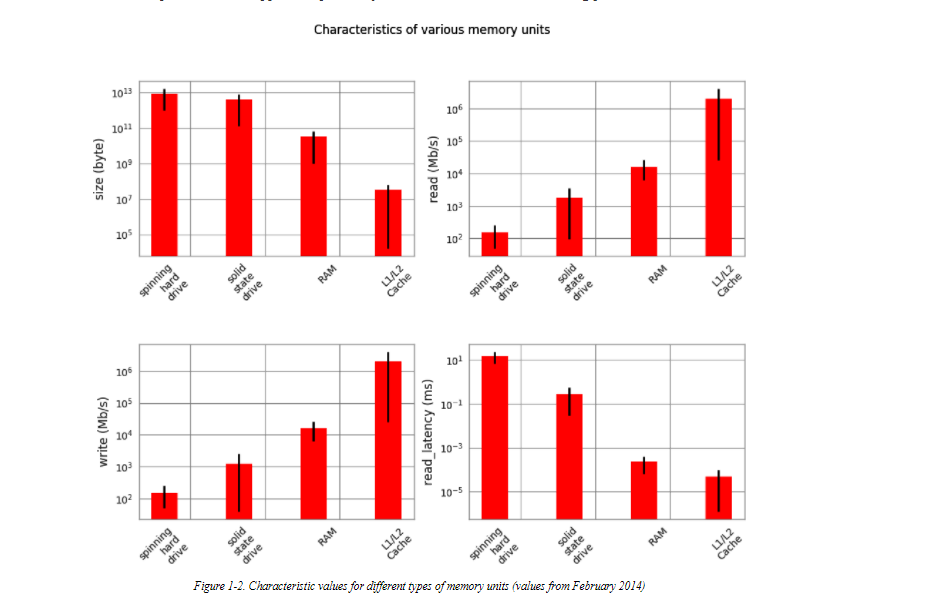








## Communication Layers


### General notes: 

* Many mode of communication exist, but all are variants of a thing called a bus (see below for example of buses in communication layer)
* Many of the benefits of the L1/L2 cache are attributes of a faster bus. 
* Many of the drawbacks of using a GPU come from the bus it's connected on. Since GPU is generally a peripheral device, it communicates through the PCI bus, which is much slower than the fronside bus
* This results in it being much more resource intensive getting data into and out of the bus. 



#### frontside bus
* connection between RAM ad the L1/L2 Cache. 
* Moves data that is ready to be transformed by the processor into the staging ground to get ready for calculation, and itmoves finished calculations out. There are other buses too, such as external bus that acts as the main route from hardware devices.

#### External bus
* acts as the main route from the hardware devices (such as hard drives and network cards) to the CPU and system memory. The external bus is generally slower than the frontside bus. 



### Network as a communication block

* in addition to the communication blocks inside your computer, the network within the computer, the network can be thought of as yet another communication block
* This block is much more flexible than the previous ones. 
* For example a network device can be connected to a memory device such as a network attached storage (NAS) device or another computing bock. As in a computing node in a cluster. 
* Network communication is much slower than the other types of communication previously mentioned. Frontside bus can transfer dozens of Gbs per second, the network is limited to the order of several dozen megabytes. 


#### Primary measure/property of a bus is it's speed! 

* how much data can be moved and how fast?
* How much data can be moved in one trasnfer (bus width)
* How many transfers the bus can do per second (bus frequency)
* data moved in one transfer is always sequential: chunk of data is read from memory and moved to another location. 
* Large bus width can help with vectorized code (or any code that sequentially reads through memory) - basically you can move all the data in one transfer
* having a small bus width and very fast frequency of transfers can help code that must do many reads from random parts of memory. Interestingly one of the ways that these properties are changed by computer designers is the physical layout of the motherboard.


#### Latency is seperate from the measures above
* Latency is the amount of time that it takes a request to be responded too. 

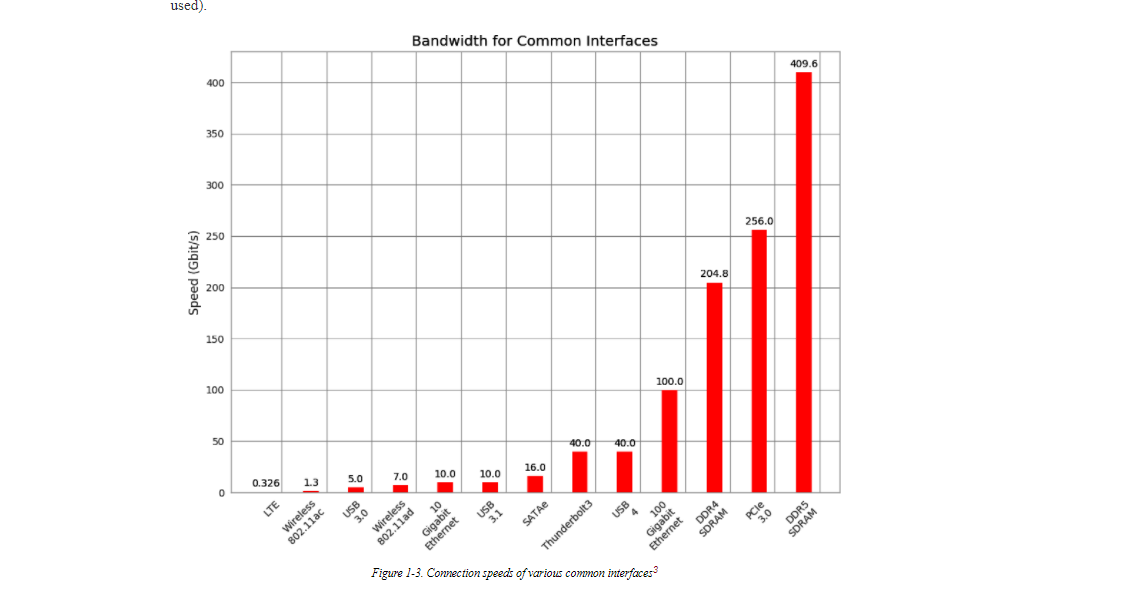




